# Clustering with Scikit-Learn

## Outline

- [1. Load Dataset](#1)
- [2. Hierarchical Clustering](#3)
- [3. DBScan](#4)
- [4. Chameleon clusters data](#5)


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

<a id='1'></a>
## 1. Load dataset

### Exercise 1
Firstly, you will load the first dataset for this lab. Read the csv file from the following path `"data_lab9/lab9_data.csv"` into a DataFrame `df`. The separator of the csv file is the comma `,`. You should skip the header of the first row (i.e., skip the first row) and set the column names to the list stored in the variable `columns`.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>To read a csv file into a DataFrame, you can use pd.read_csv().</li>
    <li>To specify the <strong>separator</strong>, you can set the 'set' parameter.</li>
    <li>To specify the <strong>column names</strong>, you can set the 'names' parameter.</li>
    <li>To specify the <strong>number of rows to skip</strong>, you can set the 'skiprows' parameter.</li>
</ul>
</p>

In [7]:
columns = ['x', 'y', 'gt']

#### START CODE HERE ####
df = pd.read_csv('data_lab9/lab9_data.csv', sep=',', names=columns, skiprows=1)

df

,x,y,gt
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0
...,...,...,...
331,638.916471,323.569096,1
332,542.005901,347.527070,0
333,611.964612,377.254978,0
334,520.654168,455.996453,0


The dataset is composed of the `x` and `y` coordinates for 336 points, and the True label in the column `gt`.
The next cell will create a DataFrame with the **input features** (i.e., all the `x` and `y` coordinates of the points) into a new DataFrame `df_X`, and a Series containing the **ground-truth labels** `gt_series`. Run the next cell to create the DataFrame and the Series. Notice that, in this case, we also have the **true labels**. Normally, when using clustering, the true labels are **not** available.

In [8]:
df_X = df[["x","y"]].copy()
gt_series = df["gt"].copy()

In [9]:
def plot_2d_scatter(df, title=""):
    """Display a 2D scatter plot
    :param df: input data points, DataFrame ('x' and 'y' coordinates in the first and second column, respectively)
    :return: fig, ax, objects
    """
    fig, ax = plt.subplots(figsize=(6, 5), dpi=90)
    ax.scatter(df.iloc[:,0], df.iloc[:,1])
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    ax.set_title(title)
    ax.grid(True)
    return fig, ax # use them for further modifications

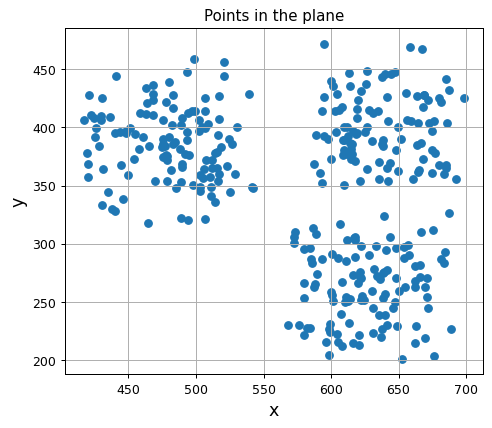

In [10]:
_, _ = plot_2d_scatter(df_X, "Points in the plane")

Therefore, for high dimensional data, it is challenging to visualize the correct number of clusters. You have to select the best number of clusters based on the analysis of the data.

In [11]:
def plot_2d_scatter_with_clusters(df, y_pred, title=""):
    """Display a 2D scatter plot with each cluster with a different color
    :param df: input data points, DataFrame ('x' and 'y' coordinates in the 'x' and 'y' columns, respectively)
    :param y_pred: numpy array with the predicted label for each pointù
    :param title: string containing the title of the chart
    :return: fig, ax, objects
    """
    fig, ax = plt.subplots(figsize=(6, 5), dpi=90)
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)

    n_clusters = list(set(y_pred))
    labels = [f"Cluster {c}" for c in n_clusters]

    for i, label in enumerate(n_clusters):

        if label == -1:
            label_name = "Outliers"
        else:
            label_name = labels[i]

        #add data points
        ax.scatter(x=df.loc[y_pred==label, 'x'],
                    y=df.loc[y_pred==label,'y'],
                    alpha=0.7, label=label_name)

    ax.legend(loc=(1.1, 0.5))
    ax.set_title(title)
    ax.grid(True)

    return fig, ax # use them for further modifications

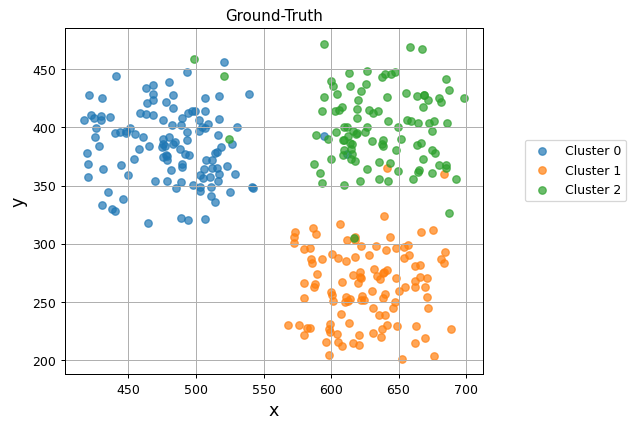

In [12]:
_, _ = plot_2d_scatter_with_clusters(df_X, gt_series, "Ground-Truth")

<a id='3'></a>
## 2. Hierarchical Clustering

Here, is already provided to you the code to run the **Hierarchical clustering**. Run the next cells to perform the hierarchical clustering. The dendrogram of the hierarchical clustering is automatically cut to match the `n_clusters` specified. 

In [ ]:
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters) 
''' 
    'ward': Merges the two clusters that cause the smallest increase in total variance, Euclidean distance, Tends to create compact, spherical clusters.
'''
y_pred_hc = hc.fit_predict(df_X)

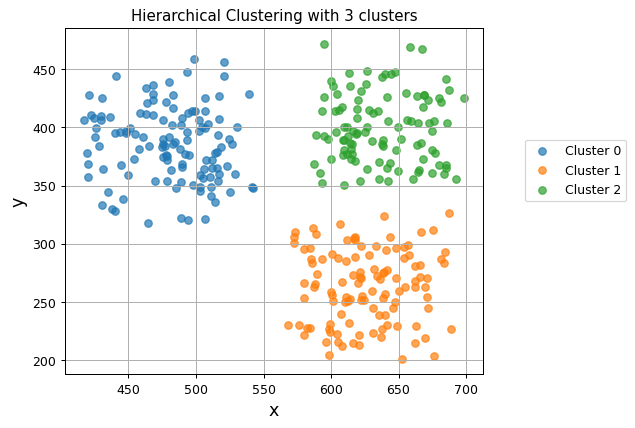

In [14]:
_, _ = plot_2d_scatter_with_clusters(df_X, y_pred_hc, f"Hierarchical Clustering with {n_clusters} clusters")

### Silhouette Score

For each point:

- \( a = \) average distance to points in its **own cluster**
- \( b = \) average distance to points in the **nearest other cluster**

The silhouette value is:
$$
\text{silhouette} = \frac{b - a}{\max\{a,\,b\}}
$$

The silhouette score is always between **-1 and 1**:
- **≈ 1** : Clusters are very good, well separated  
- **≈ 0** : Clusters overlap / unclear structure  
- **< 0** : Wrong clustering (a point is closer to another cluster than its own)


In [17]:
silh_avg_hc = silhouette_score(df_X, y_pred_hc)
print(silh_avg_hc)

0.6110715619378336


<a id='4'></a>
## 3. DBScan

In [20]:
dbscan = DBSCAN(eps=20, min_samples=10)

In [ ]:
y_pred_dbscan= dbscan.fit_predict(df_X) 
'''
    - fit: Marks points as core points, border points, or noise, predict: assign a cluster to new points based on the model learned.
    - Cannot reliably assign new points because clusters are defined by density of the original points.
    So scikit-learn does not implement predict() for DBSCAN.
'''

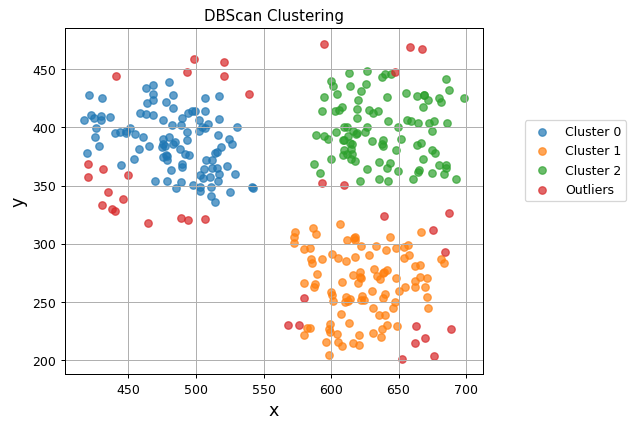

In [23]:
_, _ = plot_2d_scatter_with_clusters(df_X, y_pred_dbscan, "DBScan Clustering")

In [24]:
silh_avg_hc = silhouette_score(df_X, y_pred_dbscan)
print(silh_avg_hc)

0.49070195328408267


### Exercise 2

Now, you will move to another dataset, the `chameleon_clusters` data. This time the true labels are not available.

In [26]:
df_X_cc = pd.read_csv("data_lab9/chameleon_clusters.csv",)
df_X_cc

,x,y
0,68.601997,102.491997
1,454.665985,264.808990
2,101.283997,169.285995
3,372.614990,263.140991
4,300.989014,46.555000
...,...,...
7995,442.420990,303.721985
7996,495.451996,288.502991
7997,267.605011,141.725006
7998,238.358002,252.729996


Run the next cell to plot the points in the plane.

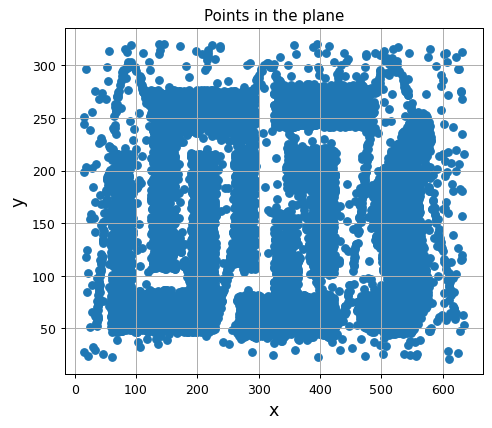

In [27]:
_, _ = plot_2d_scatter(df_X_cc, "Points in the plane")

You can see that this time the points are distributed in a more complicated manner. It is also more difficult to identify the best number of clusters. In addition, there are many points that are outliers.

For this type of data with different densities, **dbscan** may be a better choice. Perform the clustering with the **dbscan** algorithm for the data stored in `df_X_cc`. Store the predicted labels in a variable `y_pred_dbscan`. Set the parameters of the DBSCAN object as follows: `eps`=10 and `min_samples`=20. Go ahead and try changing the values to see how the results change.

0.2812131777904475


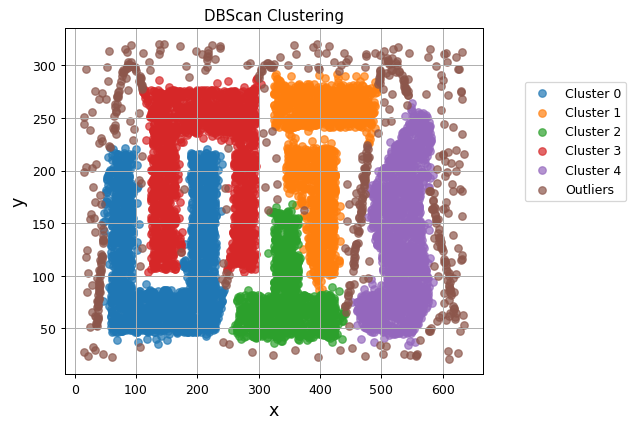

In [46]:
#### START CODE HERE ####
#### Approximately 2 line ####
dbscan = DBSCAN(eps=12, min_samples=20)
y_pred_dbscan2 = dbscan.fit_predict(df_X_cc) 

#### END CODE HERE ####
silh_avg_hc = silhouette_score(df_X_cc, y_pred_dbscan2)
print(silh_avg_hc)

_, _ = plot_2d_scatter_with_clusters(df_X_cc, y_pred_dbscan2, "DBScan Clustering")

Graphically, you can see that the DBScan seems to perform much better in this case. It can identify clusters of points and also outliers.